## Homework #5. Exploratory Data Analysis
#### Author: `Vladyslav Zhulkevskyi`
#### Total time spent on h/w (in minutes): `615`

In [33]:
import pandas as pd
import telethon
import seaborn as sns
import ast
import matplotlib.pyplot as plt
import numpy
import nltk
import re
import unicodedata
import collections

In [34]:
sns.set(rc={'figure.figsize':(15.7,8.27)})

In [35]:
DIALOGS_MERGED_DATA_PATH = "../data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "../data/merged_data/dialogs_users_all.csv"

In [36]:
df = pd.read_csv(DIALOGS_MERGED_DATA_PATH)
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [37]:
df.head(10)

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,879,2021-04-29 09:10:56+00:00,PeerUser(user_id=383618515),PeerChannel(channel_id=1480379241),NaN,дяки ❤️,text,NaN,-1001480379241
1,878,2021-04-29 09:09:44+00:00,PeerUser(user_id=281396127),PeerChannel(channel_id=1480379241),NaN,Просто чаще всего добавляются неофициальные и ...,text,NaN,-1001480379241
2,877,2021-04-29 09:09:17+00:00,PeerUser(user_id=281396127),PeerChannel(channel_id=1480379241),NaN,"Привет, вроде как да",text,NaN,-1001480379241
3,876,2021-04-29 09:05:30+00:00,PeerUser(user_id=383618515),PeerChannel(channel_id=1480379241),NaN,чи інша кількість ?,text,NaN,-1001480379241
4,875,2021-04-29 09:05:24+00:00,PeerUser(user_id=383618515),PeerChannel(channel_id=1480379241),NaN,таке запитаннячко: офіційно ж можливо дві пере...,text,NaN,-1001480379241
5,874,2021-04-29 09:05:06+00:00,PeerUser(user_id=383618515),PeerChannel(channel_id=1480379241),NaN,Привітики 👋,text,NaN,-1001480379241
6,873,2021-02-26 10:52:19+00:00,PeerUser(user_id=383618515),PeerChannel(channel_id=1480379241),NaN,так,text,NaN,-1001480379241
7,872,2021-02-26 10:45:56+00:00,PeerUser(user_id=383618515),PeerChannel(channel_id=1480379241),NaN,вона тоді б з бюджету злетіла,text,NaN,-1001480379241
8,871,2021-02-26 10:45:37+00:00,PeerUser(user_id=383618515),PeerChannel(channel_id=1480379241),NaN,немає,text,NaN,-1001480379241
9,870,2021-02-26 09:02:57+00:00,PeerUser(user_id=61792181),PeerChannel(channel_id=1480379241),NaN,Може академзаборгованість?,text,NaN,-1001480379241


In [38]:
df.shape

(2576905, 9)

In [39]:
min(df["date"]),max(df["date"])

('2016-02-01 13:34:12+00:00', '2022-11-01 01:01:34+00:00')

In [40]:
df.groupby(["type"])["type"].count()

type
photo       260436
sticker      47869
text       2216315
video        43491
voice         8794
Name: type, dtype: int64

In [41]:
df.groupby(["type"])["duration"].sum()

type
photo            0.0
sticker          0.0
text             0.0
video      2533484.0
voice       228398.0
Name: duration, dtype: float64

In [42]:
df_meta.shape

(11868, 4)

In [43]:
df_meta.head(10)

,dialog_id,name,type,users
0,-280495890,Дозор 32-го созива,Group,"{'user_id': 255026222, 'first_name': 'Kyrylo',..."
1,-280495890,Дозор 32-го созива,Group,"{'user_id': 403299058, 'first_name': 'Vladysla..."
2,-280495890,Дозор 32-го созива,Group,"{'user_id': 365047140, 'first_name': 'Жёнушка'..."
3,-280495890,Дозор 32-го созива,Group,"{'user_id': 362015063, 'first_name': 'Маленька..."
4,-280495890,Дозор 32-го созива,Group,"{'user_id': 281396127, 'first_name': 'Обережно..."
5,-280495890,Дозор 32-го созива,Group,"{'user_id': 382015004, 'first_name': 'Сальпака..."
6,506161961,Vladyslav Matus,Private dialog,"{'user_id': 506161961, 'first_name': 'Vladysla..."
7,-1001695031361,Могилянський Кібер-плац,Group,"{'user_id': 255144521, 'first_name': 'Трон', '..."
8,-1001695031361,Могилянський Кібер-плац,Group,"{'user_id': 473669329, 'first_name': 'Кіпішна ..."
9,-1001695031361,Могилянський Кібер-плац,Group,"{'user_id': 670322433, 'first_name': 'Сах', 'l..."


In [44]:
df_meta.groupby(["type"])["type"].count()

type
Channel             192
Group             11167
Private dialog      509
Name: type, dtype: int64

## Merging two pandas dataframes

In [45]:
meta_df_without_users = df_meta.drop_duplicates(subset='name', keep="first")
meta_df_without_users

,dialog_id,name,type,users
0,-280495890,Дозор 32-го созива,Group,"{'user_id': 255026222, 'first_name': 'Kyrylo',..."
6,506161961,Vladyslav Matus,Private dialog,"{'user_id': 506161961, 'first_name': 'Vladysla..."
7,-1001695031361,Могилянський Кібер-плац,Group,"{'user_id': 255144521, 'first_name': 'Трон', '..."
1393,373052947,Eugene,Private dialog,"{'user_id': 373052947, 'first_name': 'Eugene',..."
1394,-339648117,United Family,Group,"{'user_id': 384845835, 'first_name': 'Міша Фед..."
...,...,...,...,...
11847,-1001647540365,🎓КН Маги 1st level,Group,"{'user_id': 439190352, 'first_name': 'Артем', ..."
11864,426900495,𝙺𝚒 𝚁𝚎𝚠 🇺🇦,Private dialog,"{'user_id': 426900495, 'first_name': '𝙺𝚒', 'la..."
11865,209473501,Іван Дмитрасевич,Private dialog,"{'user_id': 209473501, 'first_name': 'Іван Дми..."
11866,556129937,Виктор Михайленко,Private dialog,"{'user_id': 556129937, 'first_name': 'Виктор',..."


In [46]:
def cleanUserId(userId):
    if isinstance(userId, str) and "PeerUser(user_id=" in userId:
        return int(userId[17:-1])
    return userId

In [47]:
df["from_id"] = df["from_id"].apply(cleanUserId)

In [48]:
df_meta["user_id"] = df_meta["users"].apply(lambda x: int(ast.literal_eval(x)["user_id"]))
df_meta["user_first_name"] = df_meta["users"].apply(lambda x: ast.literal_eval(x)["first_name"])
df_meta["user_last_name"] = df_meta["users"].apply(lambda x: ast.literal_eval(x)["last_name"])
df_meta["user_phone"] = df_meta["users"].apply(lambda x: ast.literal_eval(x)["phone"])
df_meta["user_username"] = df_meta["users"].apply(lambda x: ast.literal_eval(x)["username"])

In [49]:
users_df = df_meta.loc[:, 'user_id':'user_username']
users_df = users_df.drop_duplicates(subset='user_id')

In [50]:
merged_df = pd.merge(left=df, right=users_df, left_on="from_id", right_on="user_id")

In [51]:
merged_df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,user_id,user_first_name,user_last_name,user_phone,user_username
0,879,2021-04-29 09:10:56+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,дяки ❤️,text,NaN,-1001480379241,383618515,Андрій,Відейко,None,videiko
1,876,2021-04-29 09:05:30+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,чи інша кількість ?,text,NaN,-1001480379241,383618515,Андрій,Відейко,None,videiko
2,875,2021-04-29 09:05:24+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,таке запитаннячко: офіційно ж можливо дві пере...,text,NaN,-1001480379241,383618515,Андрій,Відейко,None,videiko
3,874,2021-04-29 09:05:06+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,Привітики 👋,text,NaN,-1001480379241,383618515,Андрій,Відейко,None,videiko
4,873,2021-02-26 10:52:19+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,так,text,NaN,-1001480379241,383618515,Андрій,Відейко,None,videiko
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035005,188403,2019-11-08 07:29:48+00:00,208807100,PeerChat(chat_id=379761780),NaN,"Треба перевірити в компі чи є в людини квиток,...",text,NaN,-379761780,208807100,Оля,None,None,mayfryn
2035006,188051,2019-11-07 15:32:06+00:00,208807100,PeerChat(chat_id=379761780),NaN,я теж на трішечки запізнюсь,text,NaN,-379761780,208807100,Оля,None,None,mayfryn
2035007,183698,2019-10-29 09:30:20+00:00,208807100,PeerChat(chat_id=379761780),NaN,done,text,NaN,-379761780,208807100,Оля,None,None,mayfryn
2035008,180766,2019-10-21 18:39:15+00:00,208807100,PeerChat(chat_id=379761780),NaN,XL,text,NaN,-379761780,208807100,Оля,None,None,mayfryn


In [52]:
telegram_id = 403299058

## Questions

### 1. Which type of dialog has the most messages from me?

In [53]:
my_messages_df = df.loc[df["from_id"] == telegram_id]
my_messages_df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
28,850,2021-01-27 09:25:38+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,ок),text,NaN,-1001480379241
31,847,2021-01-27 08:43:22+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,Ти писав Аліні?,text,NaN,-1001480379241
32,846,2021-01-27 08:42:43+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,"Вони є, просто вам не змогли їх видати)",text,NaN,-1001480379241
61,816,2021-01-11 13:42:29+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,Чи в тімсі),text,NaN,-1001480379241
65,812,2021-01-11 11:32:41+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,oleksandr.tryhub@ukma.edu.ua,text,NaN,-1001480379241
...,...,...,...,...,...,...,...,...,...
2576898,68386,2018-10-08 22:07:58+00:00,403299058,381627120,NaN,напомнишь утром),text,NaN,381627120
2576899,68385,2018-10-08 22:07:51+00:00,403299058,381627120,NaN,"сори, что не скинул",text,NaN,381627120
2576900,68364,2018-10-08 14:25:34+00:00,403299058,381627120,NaN,Вечером точнее,text,NaN,381627120
2576902,68362,2018-10-08 13:41:28+00:00,403299058,381627120,NaN,Позже скину,text,NaN,381627120


In [54]:
my_messages_with_groups = pd.merge(left=my_messages_df, right=df_meta, on='dialog_id').drop_duplicates(subset='id')
my_messages_with_groups

,id,date,from_id,to_id,fwd_from,message,type_x,duration,dialog_id,name,type_y,users,user_id,user_first_name,user_last_name,user_phone,user_username
0,850,2021-01-27 09:25:38+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,ок),text,NaN,-1001480379241,ФІ cтарости legacy,Group,"{'user_id': 383618515, 'first_name': 'Андрій',...",383618515,Андрій,Відейко,None,videiko
8,847,2021-01-27 08:43:22+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,Ти писав Аліні?,text,NaN,-1001480379241,ФІ cтарости legacy,Group,"{'user_id': 383618515, 'first_name': 'Андрій',...",383618515,Андрій,Відейко,None,videiko
16,846,2021-01-27 08:42:43+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,"Вони є, просто вам не змогли їх видати)",text,NaN,-1001480379241,ФІ cтарости legacy,Group,"{'user_id': 383618515, 'first_name': 'Андрій',...",383618515,Андрій,Відейко,None,videiko
24,816,2021-01-11 13:42:29+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,Чи в тімсі),text,NaN,-1001480379241,ФІ cтарости legacy,Group,"{'user_id': 383618515, 'first_name': 'Андрій',...",383618515,Андрій,Відейко,None,videiko
32,812,2021-01-11 11:32:41+00:00,403299058,PeerChannel(channel_id=1480379241),NaN,oleksandr.tryhub@ukma.edu.ua,text,NaN,-1001480379241,ФІ cтарости legacy,Group,"{'user_id': 383618515, 'first_name': 'Андрій',...",383618515,Андрій,Відейко,None,videiko
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278221,68386,2018-10-08 22:07:58+00:00,403299058,381627120,NaN,напомнишь утром),text,NaN,381627120,Yelyzaveta,Private dialog,"{'user_id': 381627120, 'first_name': 'Yelyzave...",381627120,Yelyzaveta,None,None,Lizevitto
1278222,68385,2018-10-08 22:07:51+00:00,403299058,381627120,NaN,"сори, что не скинул",text,NaN,381627120,Yelyzaveta,Private dialog,"{'user_id': 381627120, 'first_name': 'Yelyzave...",381627120,Yelyzaveta,None,None,Lizevitto
1278223,68364,2018-10-08 14:25:34+00:00,403299058,381627120,NaN,Вечером точнее,text,NaN,381627120,Yelyzaveta,Private dialog,"{'user_id': 381627120, 'first_name': 'Yelyzave...",381627120,Yelyzaveta,None,None,Lizevitto
1278224,68362,2018-10-08 13:41:28+00:00,403299058,381627120,NaN,Позже скину,text,NaN,381627120,Yelyzaveta,Private dialog,"{'user_id': 381627120, 'first_name': 'Yelyzave...",381627120,Yelyzaveta,None,None,Lizevitto


Text(0, 0.5, 'Number of my messages sent to the chat')

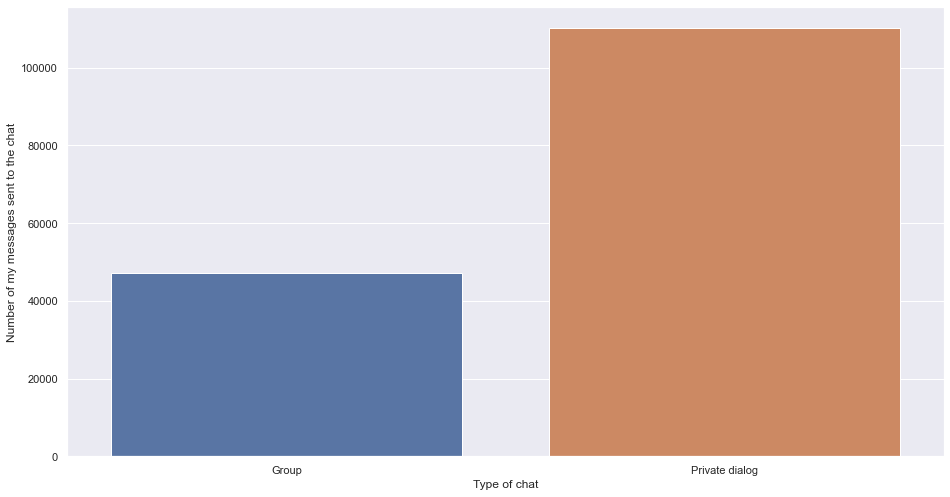

In [55]:
result1 = my_messages_with_groups.groupby(by='type_y').count()
result1
sns.barplot(x=result1.index, y='id', data=result1)
plt.xlabel("Type of chat")
plt.ylabel("Number of my messages sent to the chat")

### 2. How much messages with emojis was sent and overall percentage?

In [56]:
import emoji
import math

In [57]:
def count_emoji(text):
    emoji_counter = 0
    if text != text:
        return 0
    for char in text:
        if char in emoji.EMOJI_DATA:
            emoji_counter += 1

    return emoji_counter

In [58]:
df_emojis = df.copy()

In [59]:
df_emojis['emojis_number']= df_emojis['message'].apply(count_emoji)
df_emojis

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,emojis_number
0,879,2021-04-29 09:10:56+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,дяки ❤️,text,NaN,-1001480379241,1
1,878,2021-04-29 09:09:44+00:00,281396127,PeerChannel(channel_id=1480379241),NaN,Просто чаще всего добавляются неофициальные и ...,text,NaN,-1001480379241,0
2,877,2021-04-29 09:09:17+00:00,281396127,PeerChannel(channel_id=1480379241),NaN,"Привет, вроде как да",text,NaN,-1001480379241,0
3,876,2021-04-29 09:05:30+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,чи інша кількість ?,text,NaN,-1001480379241,0
4,875,2021-04-29 09:05:24+00:00,383618515,PeerChannel(channel_id=1480379241),NaN,таке запитаннячко: офіційно ж можливо дві пере...,text,NaN,-1001480379241,0
...,...,...,...,...,...,...,...,...,...,...
2576900,68364,2018-10-08 14:25:34+00:00,403299058,381627120,NaN,Вечером точнее,text,NaN,381627120,0
2576901,68363,2018-10-08 13:41:35+00:00,NaN,403299058,NaN,Спасибо),text,NaN,381627120,0
2576902,68362,2018-10-08 13:41:28+00:00,403299058,381627120,NaN,Позже скину,text,NaN,381627120,0
2576903,68361,2018-10-08 13:41:18+00:00,403299058,381627120,NaN,Есть,text,NaN,381627120,0


In [60]:
count_messages = len(df_emojis)
count_emojis_messages = len(df_emojis[df_emojis['emojis_number'] > 0])
print(f"Number of all messages - {count_messages}")
print(f"Number of messages with emojis - {count_emojis_messages}")
print(f"Percentage of messages with emojis - {round(count_emojis_messages / count_messages * 100,2)}%")

Number of all messages - 2576905
Number of messages with emojis - 243083
Percentage of messages with emojis - 9.43%


### 3. Average frequency of emojis per message (all and only emoji message)?

In [61]:
print(f"Frequency of emojis per message - {df_emojis['emojis_number'].mean()}")
print(f"Frequency of emojis per message (don't count messages without emojis) - {df_emojis[df_emojis['emojis_number'] > 0]['emojis_number'].mean()}")

Frequency of emojis per message - 0.2209530425064176
Frequency of emojis per message (don't count messages without emojis) - 2.3423069486553976


### 4. Number of messages with emojis only.

In [62]:
def only_emoji(text):
    if text != text:
        return False
    for char in text:
        if char not in emoji.EMOJI_DATA:
            return False

    return True

In [63]:
df_emojis['only_emoji'] = df_emojis['message'].apply(only_emoji)
count_only_emoji = len(df_emojis.loc[(df_emojis['only_emoji'] == True) & (df_emojis['type'] == 'text')])
print(f"Number of emoji only messages - {count_only_emoji}")
print(f"Percentage of emoji only messages (from all messages) - {round(count_only_emoji / count_messages * 100,2)}%")

Number of emoji only messages - 17546
Percentage of emoji only messages (from all messages) - 0.68%


### 5. Difference of emoji only and sticker messages in time.
#### Description: I've decided to check if the number of emoji only messages have changed in comparison with sticker messages after telegram have made animated emojis (19.09.2021).

In [64]:
only_emoji_df = df_emojis.loc[(df_emojis['only_emoji'] == True) & (df_emojis['type'] == 'text')]
only_emoji_df['type'] = 'emoji'
sticker_df = df[df['type'] == 'sticker']

/var/folders/rf/xgqrlrpj23qbxkjx13q_10hc0000gn/T/ipykernel_3852/400416425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_emoji_df['type'] = 'emoji'


In [65]:
dated_types_df = pd.concat([only_emoji_df, sticker_df ])
dated_types_df = dated_types_df[['date','type']]
dated_types_df['month_year'] = pd.to_datetime(dated_types_df['date']).dt.strftime('%Y.%m')
result5 = dated_types_df.groupby(['month_year','type']).count().sort_values(by='month_year')
result5

date
month_year type         
2017.05    sticker     1
2017.08    emoji     231
           sticker   350
2017.09    emoji     332
           sticker  1182
...                  ...
2022.08    sticker   525
2022.09    emoji     136
           sticker   438
2022.10    emoji     187
           sticker   668

[127 rows x 1 columns]

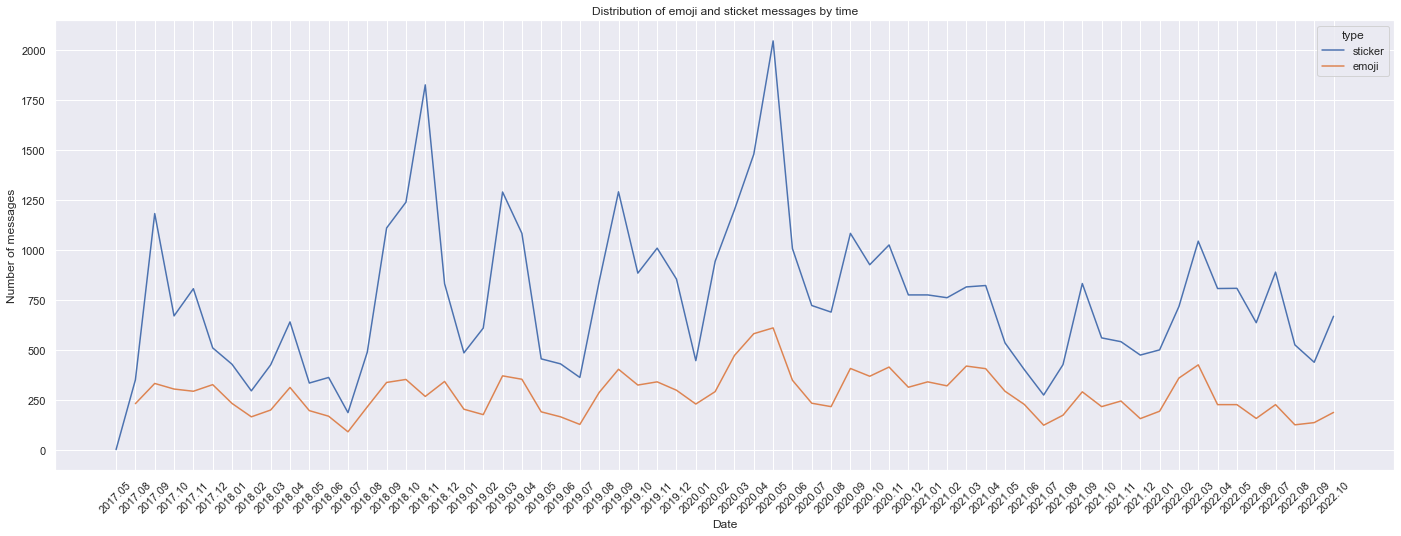

In [66]:
sns.set(rc={'figure.figsize':(24,8.27)})
sns.lineplot(data=result5, x='month_year', y='date', hue='type')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Number of messages")
plt.title("Distribution of emoji and sticket messages by time")
sns.set(rc={'figure.figsize':(15.7,8.27)})

##### Conclusion: Looks like the proportion didn't change and stickers are still more used then animated emojis

### 6. Top 20 used stickers by corresponding emoji

In [67]:
st_df_grouped = sticker_df.groupby(by='message').count().reset_index().sort_values(by='id', ascending=False)
st_df_grouped.head(20)

,message,id,date,from_id,to_id,fwd_from,type,duration,dialog_id
453,👍,2127,2127,2023,2127,9,2127,0,2127
701,😂,1311,1311,1291,1311,9,1311,0,1311
713,😎,1241,1241,1037,1241,5,1241,0,1241
714,😏,1110,1110,1091,1110,3,1110,0,1110
153,❤,1073,1073,1015,1073,4,1073,0,1073
859,🤔,989,989,974,989,2,989,0,989
154,❤️,927,927,877,927,11,927,0,927
715,😐,897,897,885,897,5,897,0,897
733,😢,893,893,877,893,3,893,0,893
732,😡,817,817,807,817,8,817,0,817


Text(0, 0.5, 'Number of stickers')

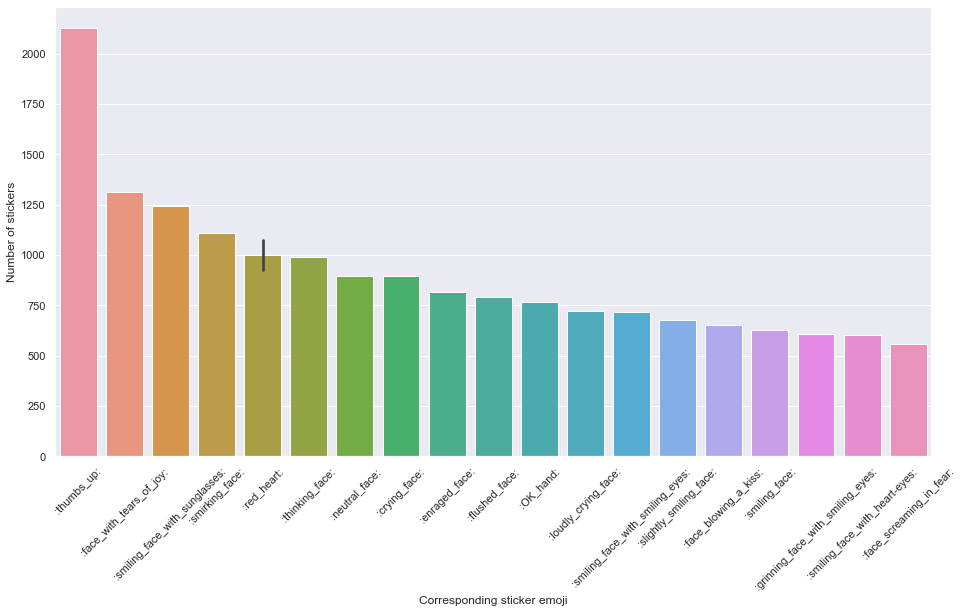

In [68]:
st_df_grouped['message'] = st_df_grouped['message'].apply(emoji.demojize)
sns.barplot(data=st_df_grouped.head(20), x='message', y='id')
plt.xticks(rotation=45)
plt.xlabel("Corresponding sticker emoji")
plt.ylabel("Number of stickers")

### 7. Top 20 used emojis in messages

In [69]:
from nltk.probability import FreqDist

In [70]:
all_emojis = [char for char in (text for text in df['message'].tolist()) if char in emoji.EMOJI_DATA]
all_emojis

['🥶',
 '😒',
 '😊',
 '😴',
 '🥺',
 '🥰',
 '🏳️\u200d🌈',
 '➕',
 '😏',
 '🤷\u200d♂️',
 '😒',
 '😳',
 '❗',
 '😉',
 '🧠',
 '😜',
 '😄',
 '✅',
 '👍',
 '👍',
 '🥁',
 '😃',
 '🔥',
 '🎊',
 '🙏',
 '🔥',
 '😆',
 '😓',
 '💪',
 '😁',
 '😃',
 '🤝',
 '😄',
 '😂',
 '👆',
 '♥️',
 '😂',
 '🤦\u200d♀️',
 '👍',
 '👍',
 '😔',
 '👍',
 '🤫',
 '😖',
 '👍',
 '👍',
 '👍',
 '😇',
 '😡',
 '👌',
 '🥳',
 '🤩',
 '😣',
 '😟',
 '🙂',
 '🙁',
 '👍',
 '🍾',
 '☺️',
 '🤘',
 '🤘',
 '🙁',
 '🥳',
 '😔',
 '🥴',
 '👉',
 '🤘',
 '👻',
 '😎',
 '☺️',
 '🙁',
 '❤️',
 '👌',
 '🙂',
 '🎸',
 '👍',
 '😊',
 '👍',
 '👍',
 '❤️',
 '👌',
 '🙂',
 '🙁',
 '😎',
 '😘',
 '💁\u200d♀',
 '🔥',
 '🔥',
 '👍',
 '🙁',
 '✅',
 '🦊',
 '👍',
 '👋',
 '👍',
 '❤',
 '💋',
 '☺️',
 '👍',
 '😭',
 '🙂',
 '🙂',
 '👍',
 '🌟',
 '🎉',
 '❤',
 '👌',
 '👍',
 '🙀',
 '🤝',
 '😙',
 '👍',
 '😞',
 '😎',
 '💪',
 '👍',
 '😎',
 '😆',
 '✅',
 '😉',
 '👍',
 '❤',
 '👏',
 '🙂',
 '👏',
 '🤦\u200d♀️',
 '👌',
 '🥰',
 '😂',
 '🤭',
 '🥳',
 '💪',
 '👍',
 '😍',
 '☹️',
 '😅',
 '🙃',
 '🤭',
 '👌',
 '👋',
 '🙃',
 '🙂',
 '😂',
 '😧',
 '🍷',
 '🙌',
 '⏰',
 '👍',
 '😊',
 '🤚🏻',
 '😕',
 '😒',
 '😄',
 '😅',
 '👍',
 '😂',
 '🤷🏼\u200d♀',
 '😭

In [71]:
fdist=FreqDist(all_emojis)
fdist

FreqDist({'😂': 3288, '👍': 2776, '❤️': 1660, '😏': 1400, '😎': 1338, '🤔': 1272, '❤': 1147, '👌': 1123, '😢': 1001, '😳': 947, ...})

In [72]:
result7 = pd.DataFrame(fdist.items(), columns=['emoji', 'frequency']).sort_values('frequency', ascending=False)
result7.head(20)

,emoji,frequency
28,😂,3288
17,👍,2776
51,❤️,1660
8,😏,1400
50,😎,1338
97,🤔,1272
57,❤,1147
37,👌,1123
133,😢,1001
10,😳,947


Text(0, 0.5, 'Number of emojis in all text messages')

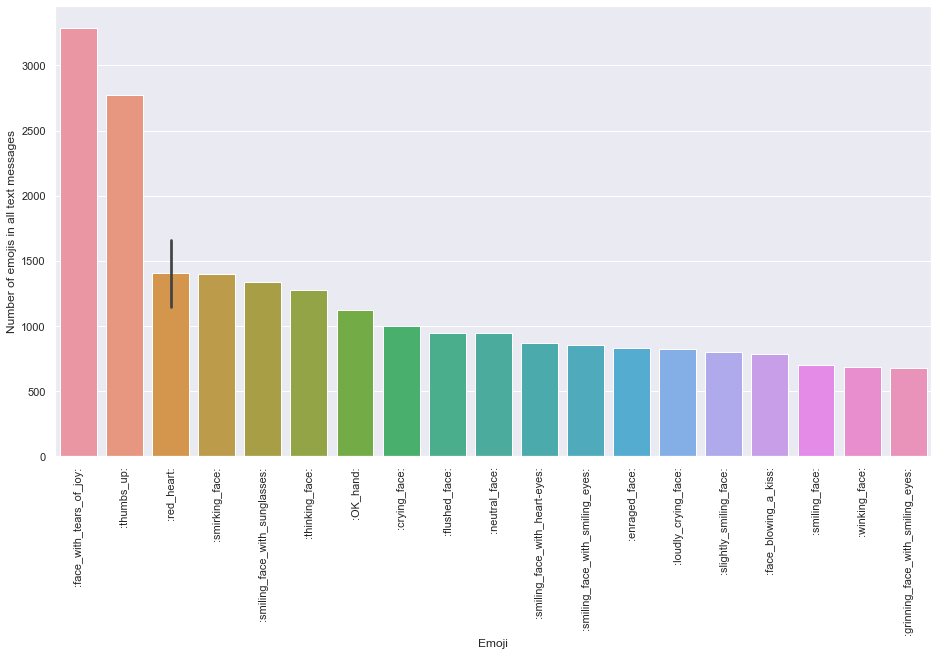

In [73]:
result7['emoji'] = result7['emoji'].apply(emoji.demojize)
sns.barplot(data=result7.head(20), x='emoji', y='frequency')
plt.xticks(rotation=90)
plt.xlabel("Emoji")
plt.ylabel("Number of emojis in all text messages")

### 8. Messages in Ukrainian, Russian, English languages

In [74]:
from langdetect import detect

In [75]:
print(len(df_meta[df_meta['type'] == 'Private dialog']))
print(len(df_meta[df_meta['dialog_id'] > 0]))
print(len(df_meta[df_meta['dialog_id'] < 0]))
print(len(df_meta))

509
509
11359
11868


In [76]:
text_df = df[df['type']=='text']
text_df=text_df.dropna(subset=['message'])
text_df = text_df[text_df['dialog_id'] > 0]
text_df

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
873,509955,2022-10-01 10:32:57+00:00,403299058,1888636991,NaN,Ні,text,NaN,1888636991
874,509954,2022-10-01 10:32:41+00:00,NaN,403299058,NaN,Я щось заплуталась,text,NaN,1888636991
875,509953,2022-10-01 10:32:37+00:00,NaN,403299058,NaN,А нас треьа йти в зал?,text,NaN,1888636991
876,509952,2022-10-01 10:24:23+00:00,403299058,1888636991,NaN,Онлайн,text,NaN,1888636991
877,509951,2022-10-01 10:21:23+00:00,NaN,403299058,NaN,Фелікс літвінський?,text,NaN,1888636991
...,...,...,...,...,...,...,...,...,...
2576900,68364,2018-10-08 14:25:34+00:00,403299058,381627120,NaN,Вечером точнее,text,NaN,381627120
2576901,68363,2018-10-08 13:41:35+00:00,NaN,403299058,NaN,Спасибо),text,NaN,381627120
2576902,68362,2018-10-08 13:41:28+00:00,403299058,381627120,NaN,Позже скину,text,NaN,381627120
2576903,68361,2018-10-08 13:41:18+00:00,403299058,381627120,NaN,Есть,text,NaN,381627120


In [77]:
def detect_lang(text):
    try:
        return detect(text)
    except:
        return 'Can\'t detect'

In [78]:
lang_df = text_df['message'].apply(detect_lang)

In [79]:
lang_df

873        uk
874        uk
875        bg
876        ru
877        uk
           ..
2576900    ru
2576901    bg
2576902    ru
2576903    uk
2576904    ru
Name: message, Length: 238961, dtype: object

In [80]:
text_df['lang'] = lang_df

In [83]:
result8 = text_df[(text_df['lang'] == 'en') | (text_df['lang'] == 'uk') |(text_df['lang'] == 'ru')]
result8['sender'] = result8['from_id'].apply(lambda x: 'me' if x == telegram_id else 'other')
result8_grouped = result8.groupby(['lang','sender']).count().reset_index()
result8_grouped

/var/folders/rf/xgqrlrpj23qbxkjx13q_10hc0000gn/T/ipykernel_3852/2862234754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result8['sender'] = result8['from_id'].apply(lambda x: 'me' if x == telegram_id else 'other')


,lang,sender,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id
0,en,me,1087,1087,1087,1087,44,1087,1087,0,1087
1,en,other,1529,1529,0,1529,70,1529,1529,0,1529
2,ru,me,46350,46350,46350,46350,644,46350,46350,0,46350
3,ru,other,57290,57290,0,57290,789,57290,57290,0,57290
4,uk,me,28909,28909,28909,28909,911,28909,28909,0,28909
5,uk,other,46057,46057,0,46057,816,46057,46057,0,46057


[Text(0, 0, 'English'), Text(1, 0, 'Russian'), Text(2, 0, 'Ukrainian')]

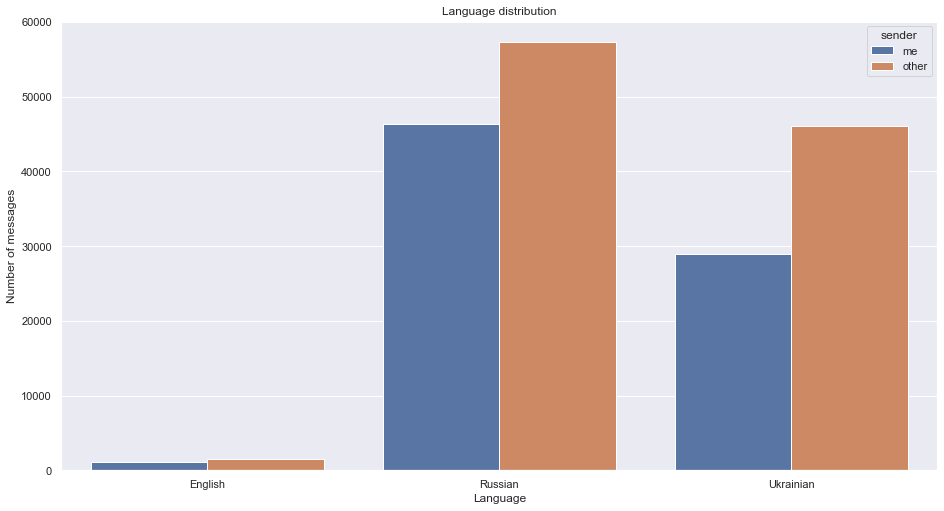

In [84]:
ax = sns.barplot(data=result8_grouped, x='lang', y='id', hue='sender')
plt.xticks(rotation=0)
plt.xlabel("Language")
plt.ylabel("Number of messages")
plt.title('Language distribution')
ax.set_xticklabels(['English','Russian','Ukrainian'])

### 9. Is language of my messages has changed after the war started?

In [85]:
result8

,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,lang,sender
873,509955,2022-10-01 10:32:57+00:00,403299058,1888636991,NaN,Ні,text,NaN,1888636991,uk,me
874,509954,2022-10-01 10:32:41+00:00,NaN,403299058,NaN,Я щось заплуталась,text,NaN,1888636991,uk,other
876,509952,2022-10-01 10:24:23+00:00,403299058,1888636991,NaN,Онлайн,text,NaN,1888636991,ru,me
877,509951,2022-10-01 10:21:23+00:00,NaN,403299058,NaN,Фелікс літвінський?,text,NaN,1888636991,uk,other
879,509925,2022-10-01 09:34:53+00:00,NaN,403299058,NaN,Привіт. Максим Струков онлайн чи офлайн?,text,NaN,1888636991,uk,other
...,...,...,...,...,...,...,...,...,...,...,...
2576899,68385,2018-10-08 22:07:51+00:00,403299058,381627120,NaN,"сори, что не скинул",text,NaN,381627120,ru,me
2576900,68364,2018-10-08 14:25:34+00:00,403299058,381627120,NaN,Вечером точнее,text,NaN,381627120,ru,me
2576902,68362,2018-10-08 13:41:28+00:00,403299058,381627120,NaN,Позже скину,text,NaN,381627120,ru,me
2576903,68361,2018-10-08 13:41:18+00:00,403299058,381627120,NaN,Есть,text,NaN,381627120,uk,me


In [86]:
result9 = result8[result8['from_id'] == telegram_id]
result9['date'] = pd.to_datetime(result9['date']).dt.date
result9_grouped = result9.groupby(by='lang').count().reset_index()
result9_grouped

/var/folders/rf/xgqrlrpj23qbxkjx13q_10hc0000gn/T/ipykernel_3852/2307732944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result9['date'] = pd.to_datetime(result9['date']).dt.date


,lang,id,date,from_id,to_id,fwd_from,message,type,duration,dialog_id,sender
0,en,1087,1087,1087,1087,44,1087,1087,0,1087,1087
1,ru,46350,46350,46350,46350,644,46350,46350,0,46350,46350
2,uk,28909,28909,28909,28909,911,28909,28909,0,28909,28909


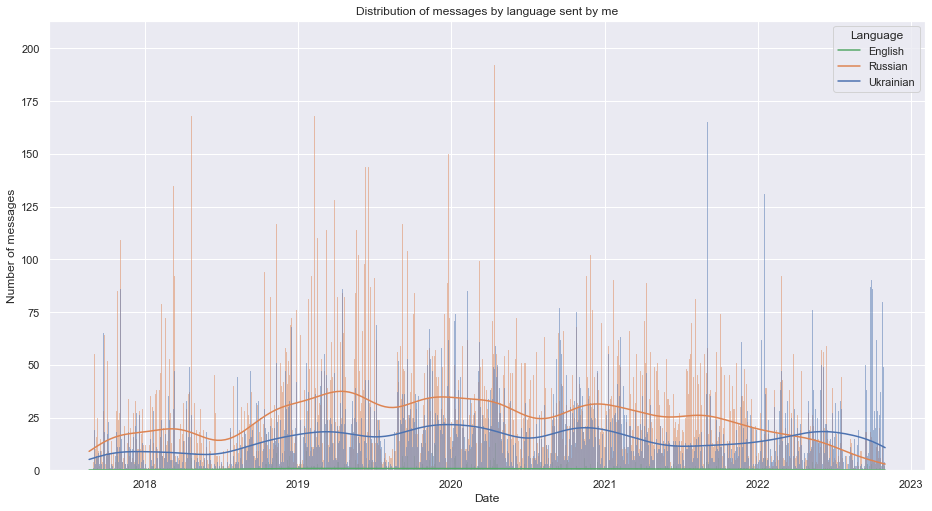

In [87]:
sns.histplot(data=result9, x='date', hue='lang', kde=True)
plt.xlabel("Date")
plt.ylabel("Number of messages")
plt.title("Distribution of messages by language sent by me")
plt.legend(title='Language',labels=['English','Russian','Ukrainian'])

### 10. Frequency of words per message (top 20)

In [88]:
def count_words(text):
    if text != text:
        return 0
    return len(text.split(' '))

In [89]:
word_count_df = df.copy()
word_count_df['word_count'] = word_count_df['message'].apply(count_words)
word_count_df = word_count_df.groupby(by='word_count').count().reset_index().sort_values('id', ascending=False)
# word_count_df.head(50)

Text(0.5, 1.0, 'Distribution of message words count')

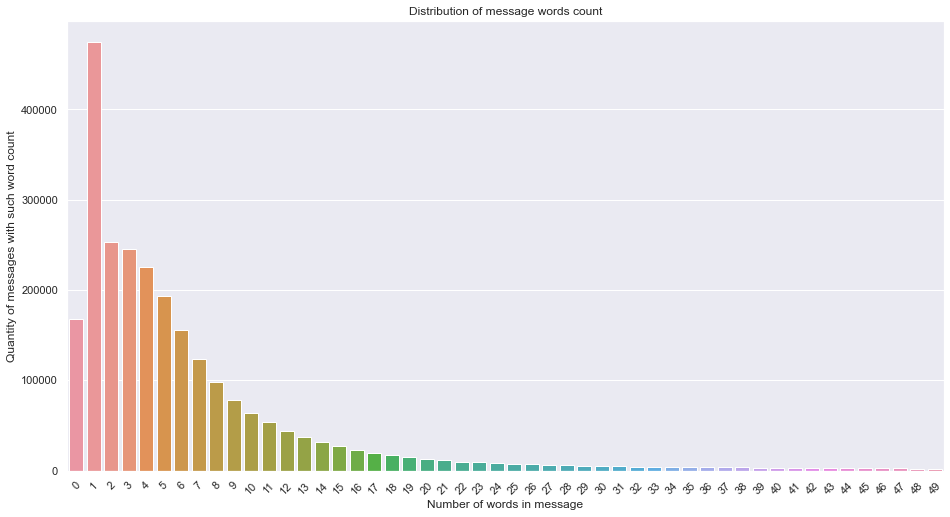

In [90]:
ax = sns.barplot(data=word_count_df.head(50), x='word_count', y='id')
plt.xticks(rotation=45)
plt.xlabel("Number of words in message")
plt.ylabel("Quantity of messages with such word count")
plt.title('Distribution of message words count')

### 11. Top 20 most frequent words

In [91]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omnivlodeg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [136]:
ua_stopwords = ['а', 'аби', 'абиде', 'абиким', 'абикого', 'абиколи', 'абикому', 'абикуди', 'абихто', 'абичий', 'абичийого', 'абичийому', 'абичим', 'абичию', 'абичия', 'абичиє', 'абичиєму', 'абичиєю', 'абичиєї', 'абичиї', 'абичиїй', 'абичиїм', 'абичиїми', 'абичиїх', 'абичого', 'абичому', 'абищо', 'абияка', 'абияке', 'абиякий', 'абияким', 'абиякими', 'абияких', 'абиякого', 'абиякому', 'абиякою', 'абиякої', 'абияку', 'абиякі', 'абиякій', 'абиякім', 'або', 'абощо', 'авжеж', 'авось', 'ага', 'ад', 'адже', 'аж', 'ажень', 'аз', 'ай', 'але', 'ало', 'амінь', 'ант', 'ану', 'ані', 'аніде', 'аніж', 'анізащо', 'аніким', 'анікого', 'анікогісінько', 'аніколи', 'анікому', 'аніскільки', 'аніхто', 'анічим', 'анічого', 'анічогісінько', 'анічому', 'аніщо', 'аніяка', 'аніяке', 'аніякий', 'аніяким', 'аніякими', 'аніяких', 'аніякого', 'аніякому', 'аніякою', 'аніякої', 'аніяку', 'аніякі', 'аніякій', 'аніякім', 'аніякісенька', 'аніякісеньке', 'аніякісенький', 'аніякісеньким', 'аніякісенькими', 'аніякісеньких', 'аніякісенького', 'аніякісенькому', 'аніякісенькою', 'аніякісенької', 'аніякісеньку', 'аніякісенькі', 'аніякісенькій', 'аніякісенькім', 'аніякісінька', 'аніякісіньке', 'аніякісінький', 'аніякісіньким', 'аніякісінькими', 'аніякісіньких', 'аніякісінького', 'аніякісінькому', 'аніякісінькою', 'аніякісінької', 'аніякісіньку', 'аніякісінькі', 'аніякісінькій', 'аніякісінькім', 'ат', 'ато', 'атож', 'ау', 'ах', 'ач', 'ачей', 'аякже', 'б', 'ба', 'багато', 'багатьма', 'багатьом', 'багатьох', 'баз', 'бай', 'бат', 'бах', 'бац', 'баш', 'бе', 'беж', 'без', 'безперервно', 'бел', 'бер', 'би', 'бир', 'бич', 'близько', 'близько від', 'бо', 'бов', 'бод', 'бодай', 'боз', 'бош', 'був', 'буває', 'буде', 'будем', 'будемо', 'будете', 'будеш', 'буду', 'будуть', 'будь', 'будь ласка', 'будьмо', 'будьте', 'була', 'були', 'було', 'бути', 'бух', 'буц', 'буцім', 'буцімто', 'бі', 'біб', 'більш', 'більше', 'біля', 'в', 'в бік', 'в залежності від', 'в міру', 'в напрямі до', 'в порівнянні з', 'в процесі', 'в результаті', 'в ролі', 'в силу', 'в сторону', 'в супроводі', 'в ході', "в ім'я", 'в інтересах', 'вад', 'важлива', 'важливе', 'важливий', 'важливі', 'вак', 'вам', 'вами', 'ван', 'вас', 'ват', 'ваш', 'ваша', 'ваше', 'вашим', 'вашими', 'ваших', 'вашого', 'вашому', 'вашою', 'вашої', 'вашу', 'ваші', 'вашій', 'вашім', 'ввесь', 'вві', 'вгору', 'вдалині', 'вед', 'верх', 'весь', 'вех', 'вже', 'вздовж', 'ви', 'виз', 'вис', 'височині', 'вище ', 'вйо', 'власне', 'властиво', 'вміти', 'внаслідок', 'вниз', 'внизу', 'во', 'вон', 'вона', 'вони', 'воно', 'восьмий', 'вперед', 'вподовж', 'впоперек', 'впритиск', 'впритул', 'впродовж', 'впрост', 'все', 'всередині', 'всею', 'вслід', 'всупереч', 'всього', 'всьому', 'всю', 'всюди', 'вся', 'всяк', 'всяка', 'всяке', 'всякий', 'всяким', 'всякими', 'всяких', 'всякого', 'всякому', 'всякою', 'всякої', 'всяку', 'всякі', 'всякій', 'всякім', 'всі', 'всій', 'всіляка', 'всіляке', 'всілякий', 'всіляким', 'всілякими', 'всіляких', 'всілякого', 'всілякому', 'всілякою', 'всілякої', 'всіляку', 'всілякі', 'всілякій', 'всілякім', 'всім', 'всіма', 'всіх', 'всією', 'всієї', 'втім', 'ві', 'віг', 'від', 'від імені', 'віддалік від', 'відколи', 'відносно', 'відповідно', 'відповідно до', 'відсотків', 'відтепер', 'відтоді', 'він', 'вісім', 'вісімнадцятий', 'вісімнадцять', 'віт', 'віф', 'віх', 'віц', 'віщо', 'віщось', 'г', 'га', 'гав', 'гаразд', 'ге', 'гез', 'гем', 'геп', 'гет', 'геть', 'гех', 'ги', 'гик', 'гир', 'гич', 'гм', 'го', 'говорив', 'гог', 'гоп', 'гоц', 'гу', 'гуп', 'д', 'да', 'давай', 'давати', 'давно', 'далеко', 'далеко від', 'далі', 'даром', 'два', 'двадцятий', 'двадцять', 'дванадцятий', 'дванадцять', 'двох', 'дві', 'де', "дев'ятий", "дев'ятнадцятий", "дев'ятнадцять", "дев'ять", 'дедалі', 'деким', 'декого', 'деколи', 'декому', 'декотра', 'декотре', 'декотрий', 'декотрим', 'декотрими', 'декотрих', 'декотрого', 'декотрому', 'декотрою', 'декотрої', 'декотру', 'декотрі', 'декотрій', 'декотрім', 'декілька', 'декільком', 'декількома', 'декількох', 'декім', 'десь', 'десятий', 'десять', 'дехто', 'дечий', 'дечийого', 'дечийому', 'дечим', 'дечию', 'дечия', 'дечиє', 'дечиєму', 'дечиєю', 'дечиєї', 'дечиї', 'дечиїй', 'дечиїм', 'дечиїми', 'дечиїх', 'дечого', 'дечому', 'дечім', 'дещо', 'деяка', 'деяке', 'деякий', 'деяким', 'деякими', 'деяких', 'деякого', 'деякому', 'деякою', 'деякої', 'деяку', 'деякі', 'деякій', 'деякім', 'деінде', 'для', 'до', 'добре', 'довго', 'довкола', 'довкіл', 'дог', 'доки', 'допоки', 'допіру', 'досить', 'досі', 'дотепер', 'доти', 'другий', 'друго', 'дуже', 'дякую', 'дійсно', 'діл', 'е', 'еге', 'еж', 'ей', 'ерг', 'ест', 'ет', 'ех', 'еч', 'ж', 'же', 'жоден', 'жодна', 'жодне', 'жодний', 'жодним', 'жодними', 'жодних', 'жодного', 'жодному', 'жодною', 'жодної', 'жодну', 'жодні', 'жодній', 'жоднім', 'жоднісінька', 'жоднісіньке', 'жоднісінький', 'жоднісіньким', 'жоднісінькими', 'жоднісіньких', 'жоднісінького', 'жоднісінькому', 'жоднісінькою', 'жоднісінької', 'жоднісіньку', 'жоднісінькі', 'жоднісінькій', 'жоднісінькім', 'жуз', 'з', 'з метою', 'з нагоди', 'з приводу', 'з розрахунку на', 'з-за', 'з-над', 'з-перед', 'з-поза', 'з-поміж', 'з-понад', 'з-поперед', 'з-посеред', 'з-проміж', 'з-під', 'з-серед', 'за', 'за винятком', 'за допомогою', 'за посередництвом', 'за рахунок', 'завгодно', 'завдяки', 'завжди', 'завше', 'задля', 'зазвичай', 'зайнята', 'зайнятий', 'зайнято', 'зайняті', 'залежно', 'залежно від', 'замість', 'занадто', 'заради', 'зараз', 'зас', 'зате', 'збоку', 'збоку від', 'зважаючи на', 'зверх ', 'зверху', 'звичайно', 'звиш', 'звідки', 'звідкилясь', 'звідкись', 'звідкіль', 'звідкіля', 'звідкілясь', 'звідси', 'звідсіль', 'звідсіля', 'звідти', 'звідтіль', 'звідтіля', 'звідусюди', 'звідусіль', 'звідціля', 'згідно з', 'здається', 'здовж', 'зем', 'зет', 'ззаду', 'зиз', 'зик', 'значить', 'знову', 'зо', 'зовсім', 'зсередини', 'зух', 'зі', 'зіс', 'и', 'ич', 'й', 'ймовірно', 'йно', 'йо', 'його', 'йой', 'йол', 'йому', 'йор', 'йот', 'йох', 'к', 'каже', 'каз', 'кар', 'каф', 'ках', 'ке', 'кед', 'кет', 'кеш', 'кив', 'кий', 'кил', 'ким', 'кимось', 'кимсь', 'ких', 'киш', 'коб', 'коби', 'кого', 'когось', 'кожен', 'кожна', 'кожне', 'кожний', 'кожним', 'кожними', 'кожних', 'кожного', 'кожному', 'кожною', 'кожної', 'кожну', 'кожні', 'кожній', 'кожнім', 'кожнісінька', 'кожнісіньке', 'кожнісінький', 'кожнісіньким', 'кожнісінькими', 'кожнісіньких', 'кожнісінького', 'кожнісінькому', 'кожнісінькою', 'кожнісінької', 'кожнісіньку', 'кожнісінькі', 'кожнісінькій', 'кожнісінькім', 'коли', 'колись', 'коло', 'кому', 'комусь', 'котра', 'котрась', 'котре', 'котресь', 'котрий', 'котрийсь', 'котрим', 'котрими', 'котримись', 'котримось', 'котримсь', 'котрих', 'котрихось', 'котрихсь', 'котрого', 'котрогось', 'котрому', 'котромусь', 'котрою', 'котроюсь', 'котрої', 'котроїсь', 'котру', 'котрусь', 'котрі', 'котрій', 'котрійсь', 'котрім', 'котрімсь', 'котрісь', 'коц', 'коч', 'коштом', 'край', 'краще', 'кру', 'круг', 'кругом', 'крю', 'кря', 'крізь', 'крім', 'куди', 'кудись', 'кудою', 'кілька', 'кільком', 'кількома', 'кількох', 'кім', 'кімось', 'кімсь', 'кінець', 'л', 'лаж', 'лап', 'лас', 'лат', 'ле', 'ледве', 'ледь', 'лет', 'лиш', 'лише', 'лишень', 'лум', 'луп', 'лут', 'льє', 'люди', 'людина', 'ля', 'лі', 'ліворуч від', 'лік', 'лім', 'м', 'мабуть', 'майже', 'мало', 'мати', 'мац', 'ме', 'меж', 'мене', 'менше', 'мені', 'мерсі', 'мет', 'мжа', 'ми', 'мимо ', 'миру', 'мит', 'мною', 'мо', 'мов', 'мовби', 'мовбито', 'могла', 'могли', 'могло', 'мого', 'могти', 'мож', 'може', 'можем', 'можемо', 'можете', 'можеш', 'можна', 'можу', 'можуть', 'можіть', 'мой', 'мол', 'мою', 'моя', 'моє', 'моєму', 'моєю', 'моєї', 'мої', 'моїй', 'моїм', 'моїми', 'моїх', 'му', 'мі', 'міг', 'між', 'мій', 'мільйонів', 'н', 'на', 'на адресу', 'на базі', 'на благо', 'на випадок', 'на відміну від', 'на засадах', 'на знак', 'на зразок', 'на користь', 'на кшталт', 'на межі', 'на основі', 'на противагу', 'на підставі', 'на честь', 'на чолі', 'на ґрунті', 'навколо', 'навкруг', 'навкруги ', 'навкіл', 'навпаки', 'навперейми', 'навпроти', 'навіть', 'навіщо', 'навіщось', 'нагорі', 'над', 'надо', 'надовкола', 'надокола', 'наді', 'назавжди', 'назад', 'назустріч', 'най', 'найбільш', 'нам', 'нами', 'наоколо ', 'наокруг ', 'наокруги ', 'наокіл', 'наперед', 'напередодні', 'напереді', 'наперекір', 'напереріз', 'наприкінці', 'напроти', 'нарешті', 'нарівні з', 'нас', 'насеред', 'насподі', 'наспід', 'настрічу', 'насупроти', 'насупротив ', 'нате', 'наче', 'начеб', 'начебто', 'наш', 'наша', 'наше', 'нашим', 'нашими', 'наших', 'нашого', 'нашому', 'нашою', 'нашої', 'нашу', 'наші', 'нашій', 'нашім', 'не', 'не до', 'не можна', 'неабичим', 'неабичого', 'неабичому', 'неабищо', 'небагато', 'небагатьма', 'небагатьом', 'небагатьох', 'небудь', 'невважаючи', 'невже', 'недалеко', 'недалеко від', 'неж', 'незалежно від', 'незважаючи', 'незважаючи на', 'ней', 'немає', 'немов', 'немовби', 'немовбито', 'неначе', 'неначебто', 'неподалеку', 'неподалеку від', 'неподалечку', 'неподалечку від', 'неподалік', 'неподалік від', 'нерідко', 'нех', 'нехай', 'нещодавно', 'нею', 'неї', 'нижче', 'низько', 'ник', 'ним', 'ними', 'них', 'нич', 'но', 'ну', 'нуг', 'нуд', 'нум', 'нумо', 'нумте', 'ньо', 'нього', 'ньому', 'ню', 'нюх', 'ня', 'няв', 'ні', 'ніби', 'ніби-то', 'нібито', 'ніде', 'ніж', 'нізащо', 'нізвідки', 'нізвідкіля', 'ній', 'ніким', 'нікого', 'нікогісінько', 'ніколи', 'нікому', 'нікотра', 'нікотре', 'нікотрий', 'нікотрим', 'нікотрими', 'нікотрих', 'нікотрого', 'нікотрому', 'нікотрою', 'нікотрої', 'нікотру', 'нікотрі', 'нікотрій', 'нікотрім', 'нікуди', 'нім', 'нінащо', 'ніскільки', 'ніт', 'ніхто', 'нічий', 'нічийна', 'нічийне', 'нічийний', 'нічийним', 'нічийними', 'нічийних', 'нічийного', 'нічийному', 'нічийною', 'нічийної', 'нічийну', 'нічийні', 'нічийній', 'нічийнім', 'нічийого', 'нічийому', 'нічим', 'нічию', 'нічия', 'нічиє', 'нічиєму', 'нічиєю', 'нічиєї', 'нічиї', 'нічиїй', 'нічиїм', 'нічиїми', 'нічиїх', 'нічого', 'нічому', 'ніщо', 'ніяк', 'ніяка', 'ніяке', 'ніякий', 'ніяким', 'ніякими', 'ніяких', 'ніякого', 'ніякому', 'ніякою', 'ніякої', 'ніяку', 'ніякі', 'ніякій', 'ніякім', 'ніякісінька', 'ніякісіньке', 'ніякісінький', 'ніякісіньким', 'ніякісінькими', 'ніякісіньких', 'ніякісінького', 'ніякісінькому', 'ніякісінькою', 'ніякісінької', 'ніякісіньку', 'ніякісінькі', 'ніякісінькій', 'ніякісінькім', 'о', 'об', 'обабіч', 'обаполи', 'обидва', 'обр', 'обік', 'обіруч', 'обіч', 'ов', 'од', 'один', 'одинадцятий', 'одинадцять', 'одна', 'однак', 'одначе', 'одне', 'одним', 'одними', 'одних', 'одно', 'одного', 'одного разу', 'одному', 'одною', 'одної', 'одну', 'одні', 'одній', 'однім', 'однією', 'однієї', 'ож', 'ой', 'окрай', 'окроме', 'округ', 'округи', 'окрім', 'окіл', 'ом', 'он', 'онде', 'онно', 'оно', 'оподаль', 'оподаль від', 'оподалік', 'оподалік від', 'опостін', 'опостінь', 'опроче', 'опріч', 'опріче', 'опісля', 'осе', 'оскільки', 'особливо', 'осторонь', 'ось', 'осісьо', 'от', 'ота', 'отак', 'отака', 'отаке', 'отакий', 'отаким', 'отакими', 'отаких', 'отакого', 'отакому', 'отакою', 'отакої', 'отаку', 'отакі', 'отакій', 'отакім', 'отакісінька', 'отакісіньке', 'отакісінький', 'отакісіньким', 'отакісінькими', 'отакісіньких', 'отакісінького', 'отакісінькому', 'отакісінькою', 'отакісінької', 'отакісіньку', 'отакісінькі', 'отакісінькій', 'отакісінькім', 'отам', 'оте', 'отже', 'отим', 'отими', 'отих', 'ото', 'отого', 'отож', 'отой', 'отому', 'отою', 'отої', 'отсе', 'оттак', 'отто', 'оту', 'отут', 'оті', 'отій', 'отім', 'отією', 'отієї', 'ох', 'оце', 'оцей', 'оцим', 'оцими', 'оцих', 'оцього', 'оцьому', 'оцю', 'оця', 'оці', 'оцій', 'оцім', 'оцією', 'оцієї', 'п', "п'я", "п'ятий", "п'ятнадцятий", "п'ятнадцять", "п'ять", 'па', 'пад', 'пак', 'пек', 'перед', 'передо', 'переді', 'перетака', 'перетаке', 'перетакий', 'перетаким', 'перетакими', 'перетаких', 'перетакого', 'перетакому', 'перетакою', 'перетакої', 'перетаку', 'перетакі', 'перетакій', 'перетакім', 'перший', 'пиж', 'плі', 'по', 'поблизу', 'побік', 'побіля', 'побіч', 'поверх', 'повз', 'повздовж', 'повинно', 'повище', 'повсюди', 'повсюдно', 'подаль від', 'подалі від', 'подекуди', 'подеяка', 'подеяке', 'подеякий', 'подеяким', 'подеякими', 'подеяких', 'подеякого', 'подеякому', 'подеякою', 'подеякої', 'подеяку', 'подеякі', 'подеякій', 'подеякім', 'подовж', 'подібно до', 'поз', 'поза', 'позад', 'позаду', 'позата', 'позате', 'позатим', 'позатими', 'позатих', 'позатого', 'позатой', 'позатому', 'позатою', 'позатої', 'позату', 'позаті', 'позатій', 'позатім', 'позатією', 'позатієї', 'позаяк', 'поздовж', 'поки', 'покрай', 'покіль', 'помежи', 'помимо', 'поміж', 'помість', 'понад', 'понадо', 'понаді', 'понижче', 'пообіч', 'поодаль від', 'поодалік від', 'поперед', 'попереду', 'поперек', 'попліч', 'попри', 'попросту', 'попід', 'пора', 'поруч', 'поряд', 'поряд з', 'порівняно з', 'посеред', 'посередині', 'потрібно', 'потім', 'поуз', 'початку', 'почерез', 'праворуч від', 'пред', 'предо', 'преді', 'прекрасно', 'прецінь', 'при', 'притому', 'причому', 'причім', 'про', 'проз', 'промеж', 'проміж', 'просто', 'проте', 'проти', 'против', 'противно', 'протягом', 'пря', 'пріч', 'пхе', 'пху', 'пі', 'пів', 'півперек', 'під', 'під знаком', 'під приводом', 'під час', 'підо', 'пізніше', 'пім', 'пір', 'після', 'р', 'ради', 'раз', 'разом з', 'разу', 'рано', 'раніш', 'раніш від', 'раніше', 'раніше від', 'раптом', 'ре', 'рет', 'риж', 'рим', 'рип', 'роб', 'року', 'років', 'рос', 'рох', 'році', 'рус', 'рух', 'руч', 'рік', 'с', 'саж', 'саз', 'сак', 'сам', 'сама', 'саме', 'сами', 'самий', 'самим', 'самими', 'самих', 'само', 'самого', 'самому', 'самою', 'самої', 'саму', 'самі', 'самій', 'самім', 'сап', 'сас', 'свого', 'свою', 'своя', 'своє', 'своєму', 'своєю', 'своєї', 'свої', 'своїй', 'своїм', 'своїми', 'своїх', 'свій', 'се', 'себе', 'себто', 'сей', 'сен', 'серед', 'середи', 'середу', 'сеч', 'си', 'сив', 'сиг', 'сиз', 'сик', 'сиріч', 'сих', 'сказав', 'сказала', 'сказати', 'скрізь', 'скільки', 'скільки-то', 'скількись', 'скільком', 'скількома', 'скількомась', 'скількомось', 'скількомсь', 'скількох', 'скількохось', 'скількохсь', 'сли', 'слідом за', 'соб', 'собою', 'собі', 'соп', 'спасибі', 'спереду', 'спочатку', 'справ', 'справді', 'став', 'стосовно', 'стільки', 'стільком', 'стількома', 'стількох', 'су', 'судячи з', 'супроти', 'супротив', 'суть', 'суч', 'суш', 'сьогодні', 'сьомий', 'сюди', 'ся', 'сяг', 'сяк', 'сяка', 'сяке', 'сякий', 'сяким', 'сякими', 'сяких', 'сякого', 'сякому', 'сякою', 'сякої', 'сяку', 'сякі', 'сякій', 'сякім', 'сям', 'сі', 'сім', 'сімнадцятий', 'сімнадцять', 'сіп', 'т', 'та', 'таж', 'так', 'така', 'таке', 'такенна', 'такенне', 'такенний', 'такенним', 'такенними', 'такенних', 'такенного', 'такенному', 'такенною', 'такенної', 'такенну', 'такенні', 'такенній', 'такеннім', 'таки', 'такий', 'таким', 'такими', 'таких', 'такого', 'також', 'такому', 'такою', 'такої', 'таку', 'такі', 'такій', 'такім', 'такісінька', 'такісіньке', 'такісінький', 'такісіньким', 'такісінькими', 'такісіньких', 'такісінького', 'такісінькому', 'такісінькою', 'такісінької', 'такісіньку', 'такісінькі', 'такісінькій', 'такісінькім', 'тал', 'там', 'тамки', 'тамта', 'тамте', 'тамтим', 'тамтими', 'тамтих', 'тамтого', 'тамтой', 'тамтому', 'тамтою', 'тамтої', 'тамту', 'тамті', 'тамтій', 'тамтім', 'тамтією', 'тамтієї', 'тар', 'тат', 'таш', 'тва', 'твого', 'твою', 'твоя', 'твоє', 'твоєму', 'твоєю', 'твоєї', 'твої', 'твоїй', 'твоїм', 'твоїми', 'твоїх', 'твій', 'те', 'тебе', 'тег', 'теж', 'тем', 'тепер', 'теперечки', 'тес', 'теф', 'теє', 'ти', 'тик', 'тил', 'тим', 'тими', 'тисяч', 'тих', 'то', 'тобою', 'тобто', 'тобі', 'того', 'тоді', 'тож', 'той', 'тол', 'тому', 'тому що', 'тот', 'тощо', 'тою', 'тої', 'тра', 'тре', 'треба', 'третій', 'три', 'тринадцятий', 'тринадцять', 'трохи', 'тс', 'тсс', 'ту', 'туди', 'тудою', 'туп', 'тут', 'тутеньки', 'тутечки', 'тутки', 'туф', 'туц', 'тю', 'тюг', 'тюп', 'тяг', 'тяж', 'тям', 'тяп', 'ті', 'тій', 'тільки', 'тім', 'тією', 'у', 'у бік', 'у вигляді', 'у випадку', 'у відповідності до', 'у відповідь на', 'у залежності від', "у зв'язку з", 'у міру', 'у напрямі до', 'у порівнянні з', 'у процесі', 'у результаті', 'у ролі', 'у силу', 'у сторону', 'у супроводі', 'у ході', 'ув', 'увесь', 'уві', 'угу', 'уже', 'узбіч', 'уздовж', 'укр', 'ум', 'унаслідок', 'униз', 'унизу', 'унт', 'уперед', 'уподовж', 'упоперек', 'упритиск до', 'упритул до', 'упродовж', 'упрост', 'ус', 'усе', 'усередині', 'услід', 'услід за', 'усупереч', 'усього', 'усьому', 'усю', 'усюди', 'уся', 'усяк', 'усяка', 'усяке', 'усякий', 'усяким', 'усякими', 'усяких', 'усякого', 'усякому', 'усякою', 'усякої', 'усяку', 'усякі', 'усякій', 'усякім', 'усі', 'усій', 'усіляка', 'усіляке', 'усілякий', 'усіляким', 'усілякими', 'усіляких', 'усілякого', 'усілякому', 'усілякою', 'усілякої', 'усіляку', 'усілякі', 'усілякій', 'усілякім', 'усім', 'усіма', 'усіх', 'усією', 'усієї', 'утім', 'ух', 'ф', "ф'ю", 'фа', 'фаг', 'фай', 'фат', 'фе', 'фед', 'фез', 'фес', 'фет', 'фзн', 'фоб', 'фот', 'фра', 'фру', 'фу', 'фук', 'фур', 'фус', 'фіш', 'х', 'ха', 'хаз', 'хай', 'хап', 'хат', 'хащ', 'хе', 'хет', 'хи', 'хиб', 'хм', 'хо', 'хов', 'хол', 'хон', 'хоп', 'хор', 'хотіти', 'хоч', 'хоча', 'хочеш', 'хро', 'хрю', 'хто', 'хтось', 'ху', 'хуз', 'хук', 'хух', 'хху', 'хіба', 'ц', 'це', 'цебто', 'цей', 'цеп', 'ци', 'цим', 'цими', 'цир', 'цих', 'цло', 'цоб', 'цок', 'цоп', 'цор', 'цс', 'цсс', 'цуг', 'цур', 'цуц', 'цього', 'цьому', 'цю', 'цюк', 'ця', 'цяв', 'цяп', 'ці', 'цід', 'цій', 'цім', 'ціною', 'цією', 'цієї', 'ч', 'чал', 'чар', 'час', 'часто', 'частіше', 'часу', 'чах', 'чей', 'чень', 'через', 'четвертий', 'чи', 'чий', 'чийого', 'чийогось', 'чийому', 'чийомусь', 'чийсь', 'чик', 'чим', 'чимось', 'чимсь', 'чир', 'численна', 'численне', 'численний', 'численним', 'численними', 'численних', 'численні', 'чию', 'чиюсь', 'чия', 'чиясь', 'чиє', 'чиєму', 'чиємусь', 'чиєсь', 'чиєю', 'чиєюсь', 'чиєї', 'чиєїсь', 'чиї', 'чиїй', 'чиїйсь', 'чиїм', 'чиїми', 'чиїмись', 'чиїмось', 'чиїмсь', 'чиїсь', 'чиїх', 'чиїхось', 'чиїхсь', 'чля', 'чого', 'чогось', 'чом', 'чому', 'чомусь', 'чон', 'чоп', 'чортзна', 'чос', 'чотири', 'чотирнадцятий', 'чотирнадцять', 'чу', 'чум', 'чур', 'чш', 'чім', 'чімось', 'чімсь', 'чіт', 'ш', 'ша', 'шаг', 'шал', 'шам', 'шво', 'шед', 'шен', 'шиз', 'шир', 'шляхом', 'шостий', 'шістнадцятий', 'шістнадцять', 'шість', 'щ', 'ще', 'щем', 'щеп', 'щип', 'щир', 'що', 'щоб', 'щоби', 'щодо', 'щойно', 'щоправда', 'щось', 'щі', 'ь', 'ю', 'юз', 'юн', 'юнь', 'юс', 'ют', 'юхт', 'я', 'яв', 'яд', 'яз', 'язь', 'як', 'яка', 'якась', 'якби', 'яке', 'якесь', 'який', 'якийсь', 'яким', 'якими', 'якимись', 'якимось', 'якимсь', 'яких', 'якихось', 'якихсь', 'якого', 'якогось', 'якому', 'якомусь', 'якось', 'якою', 'якоюсь', 'якої', 'якоїсь', 'якраз', 'яку', 'якусь', 'якщо', 'які', 'якій', 'якійсь', 'якім', 'якімсь', 'якісь', 'ял', 'ям', 'ян', 'янь', 'яо', 'яп', 'ярл', 'ясь', 'ять', 'є', 'єр', 'єси', 'і', 'ібн', 'ід', 'із', 'із-за', 'із-під', 'іззаду', 'ізм', 'ізсередини', 'ік', 'ікс', 'ікт', "ім'я", 'імовірно', 'інакша', 'інакше', 'інакший', 'інакшим', 'інакшими', 'інакших', 'інакшого', 'інакшому', 'інакшою', 'інакшої', 'інакшу', 'інакші', 'інакшій', 'інакшім', 'інколи', 'іноді', 'інша', 'інше', 'інший', 'іншим', 'іншими', 'інших', 'іншого', 'іншому', 'іншою', 'іншої', 'іншу', 'інші', 'іншій', 'іншім', 'інь', 'іч', 'іще', 'ї', 'їдь', 'їй', 'їм', 'їх', 'їхнього', 'їхньому', 'їхньою', 'їхньої', 'їхню', 'їхня', 'їхнє', 'їхні', 'їхній', 'їхнім', 'їхніми', 'їхніх', 'її', 'ґ']
stopwords = nltk.corpus.stopwords.words('russian') + ua_stopwords + ['nan']

In [93]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('russian') + ua_stopwords
    regex = r'\b\w+\b'
    words = re.findall(regex,text)
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [107]:
from nltk.tokenize import RegexpTokenizer
regexp=RegexpTokenizer('\w+')

In [118]:
texts = [regexp.tokenize(str(text)) for text in my_messages_df['message'].tolist()]


In [137]:
texts_filtered = [[word.lower() for word in text if word not in stopwords and len(word) > 1] for text in texts]

In [138]:
texts_filtered[:10]

[['ок'],
 ['ти', 'писав', 'аліні'],
 ['вони', 'змогли', 'видати'],
 ['чи', 'тімсі'],
 ['oleksandr', 'tryhub', 'ukma', 'edu', 'ua'],
 ['protsenko', 'ukma', 'edu', 'ua'],
 ['сорокина'],
 ['вы', 'валите', 'сорокиной'],
 ['вообщем', 'удачки', 'лаагом', 'дискреткой', 'спать'],
 ['командная',
  'работа',
  'которую',
  'не',
  'особо',
  'хочу',
  'исполнять',
  'один']]

In [139]:
counts11 = collections.Counter()
for text in texts_filtered:
    counts11.update(text)

In [143]:
counts11.most_common(20)

[('ок', 5779),
 ('это', 5340),
 ('ну', 4462),
 ('https', 2575),
 ('да', 2301),
 ('завтра', 2251),
 ('так', 1980),
 ('типа', 1902),
 ('но', 1780),
 ('не', 1746),
 ('привет', 1725),
 ('всё', 1693),
 ('точно', 1648),
 ('та', 1574),
 ('норм', 1565),
 ('думаю', 1417),
 ('com', 1399),
 ('привіт', 1359),
 ('10', 1299),
 ('вроде', 1290)]

In [158]:
counts11_df = pd.DataFrame.from_dict(counts11, orient='index').reset_index().sort_values(by=0, ascending=False)

Text(0.5, 1.0, 'Frequency of words in messages')

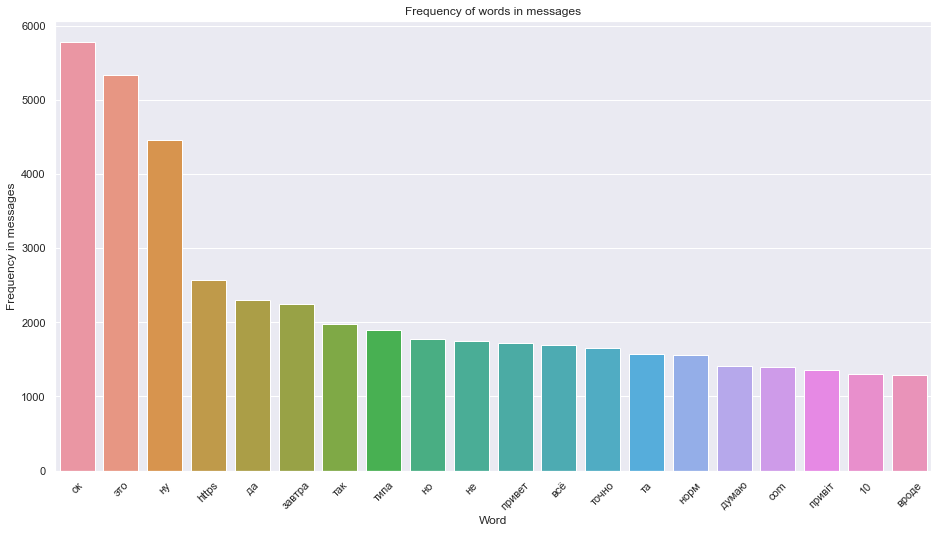

In [157]:
sns.barplot(data=counts11_df.head(20), x='index', y=0)
plt.xticks(rotation=45)
plt.xlabel("Word")
plt.ylabel("Frequency in messages")
plt.title('Top 20 words by frequency in messages')

### 12. Top 20 bigrams

In [144]:
counts12 = collections.Counter()
for text in texts_filtered:
    counts12.update(nltk.ngrams(text, 2))

In [145]:
counts12.most_common(20)

[(('ukma', 'edu'), 426),
 (('edu', 'ua'), 426),
 (('https', 'www'), 346),
 (('https', 'me'), 267),
 (('доброго', 'дня'), 246),
 (('google', 'com'), 202),
 (('ну', 'типа'), 197),
 (('самом', 'деле'), 186),
 (('com', 'ua'), 183),
 (('ну', 'типу'), 171),
 (('https', 'docs'), 171),
 (('ua', 'course'), 165),
 (('docs', 'google'), 162),
 (('всё', 'ок'), 159),
 (('my', 'ukma'), 159),
 (('youtube', 'com'), 154),
 (('https', 'my'), 146),
 (('for', 'int'), 143),
 (('com', 'watch'), 140),
 (('всё', 'равно'), 135)]

In [159]:
counts12_df = pd.DataFrame.from_dict(counts12, orient='index').reset_index().sort_values(by=0, ascending=False)

Text(0.5, 1.0, 'Frequency of words in messages')

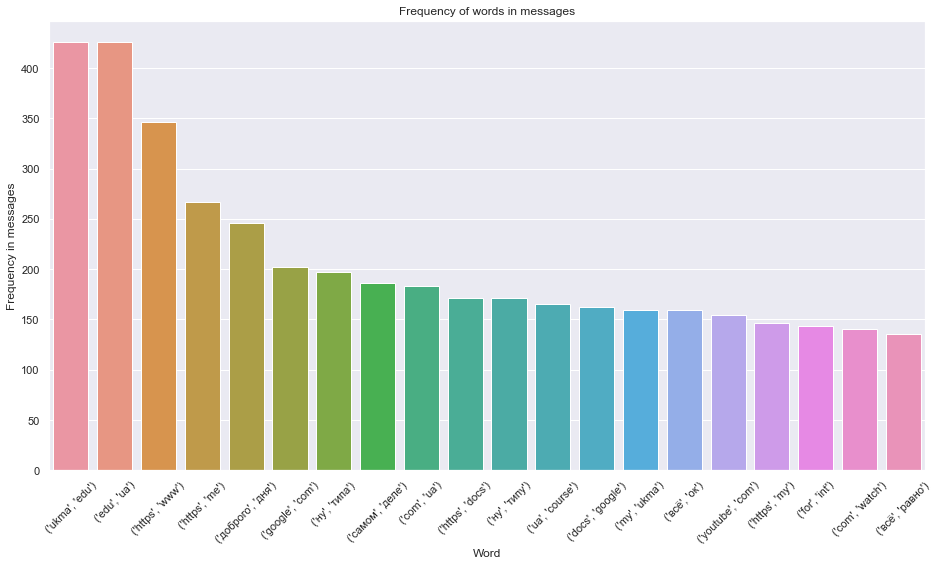

In [160]:
sns.barplot(data=counts12_df.head(20), x='index', y=0)
plt.xticks(rotation=45)
plt.xlabel("Bigram")
plt.ylabel("Frequency in messages")
plt.title('Top 20 bigrams by frequency in messages')

### 13. Top 20 trigrams

In [146]:
counts13 = collections.Counter()
for text in texts_filtered:
    counts13.update(nltk.ngrams(text, 3))

In [147]:
counts13.most_common(20)

[(('ukma', 'edu', 'ua'), 423),
 (('edu', 'ua', 'course'), 165),
 (('https', 'docs', 'google'), 162),
 (('docs', 'google', 'com'), 162),
 (('my', 'ukma', 'edu'), 155),
 (('https', 'my', 'ukma'), 145),
 (('youtube', 'com', 'watch'), 140),
 (('https', 'youtu', 'be'), 128),
 (('фінанси', 'банківська', 'справа'), 93),
 (('банківська', 'справа', 'страхування'), 93),
 (('економіка', 'фінанси', 'банківська'), 90),
 (('справа', 'страхування', 'маркетинг'), 90),
 (('страхування', 'маркетинг', 'менеджмент'), 90),
 (('5168', '7453', '0029'), 89),
 (('7453', '0029', '8129'), 89),
 (('жулкевський', 'владислав', 'дмитрович'), 88),
 (('https', 'youtube', 'com'), 84),
 (('https', 'goo', 'gl'), 83),
 (('google', 'com', 'spreadsheets'), 79),
 (('номер', 'картки', '5168'), 76)]

In [163]:
counts13_df = pd.DataFrame.from_dict(counts13, orient='index').reset_index().sort_values(by=0, ascending=False)

Text(0.5, 1.0, 'Top 20 trigrams by frequency in messages')

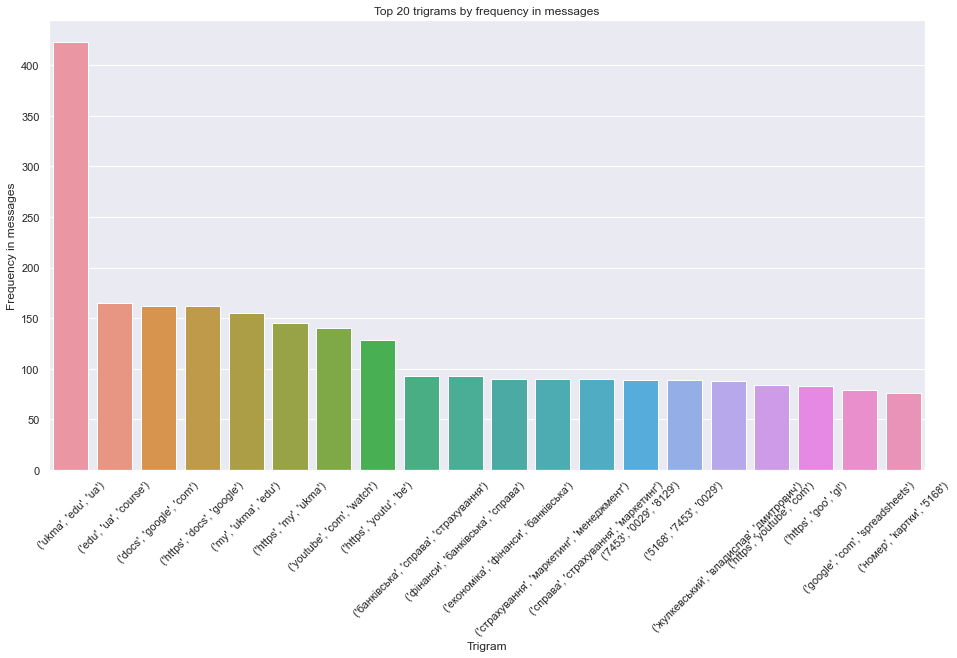

In [164]:
sns.barplot(data=counts13_df.head(20), x='index', y=0)
plt.xticks(rotation=45)
plt.xlabel("Trigram")
plt.ylabel("Frequency in messages")
plt.title('Top 20 trigrams by frequency in messages')

### 14. When during the day do I write most of the messages?

In [ ]:
result14 = df.copy()
result14['hour'] = pd.to_datetime(result13['date']).dt.hour
result14['chat_type'] = result14['dialog_id'].apply(lambda x: 'private dialog' if x > 0 else 'channel')
result14['sender'] = result14['from_id'].apply(lambda x: 'me' if x == telegram_id else 'other')

Text(0.5, 1.0, 'Number of messages during the day hours')

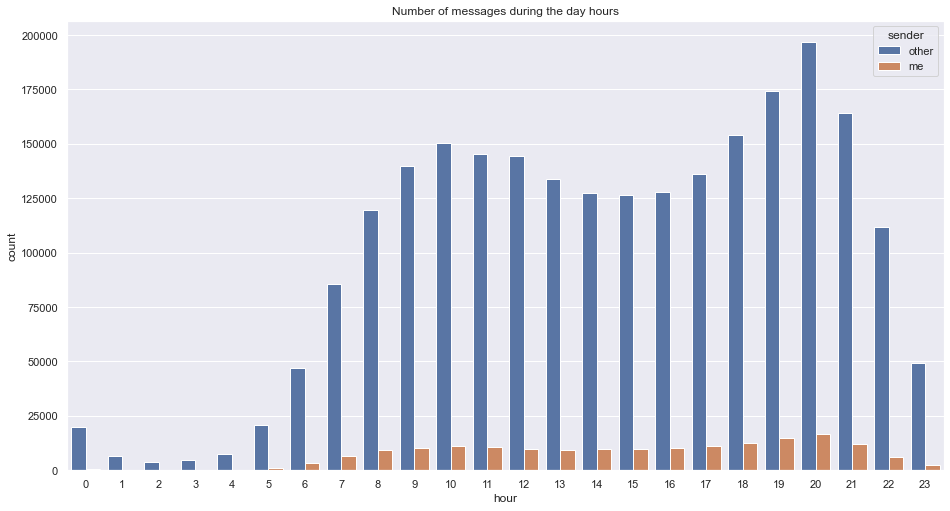

In [100]:
sns.countplot(data=result14, x='hour', hue='sender')
plt.title("Number of messages during the day hours")

### 15. Messages during week days 

In [103]:
result15 = df.copy()
result15['weekday'] = pd.to_datetime(result13['date']).dt.weekday
result15['sender'] = result15['from_id'].apply(lambda x: 'me' if x == telegram_id else 'other')

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

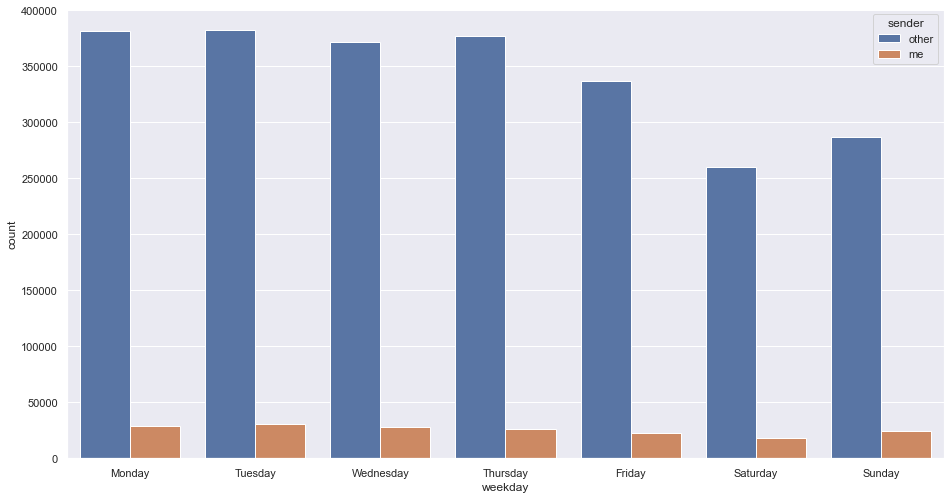

In [106]:
ax = sns.countplot(data=result15, x='weekday', hue='sender')
ax.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

### 16. Number of messages with war keywords before the war and during the war?

In [174]:
keywords =['війна', 'война', 'вибух', 'взрыв', 'тривога', 'сховище', 'укрытие','ракета', 'безпілотник', 'загиблі', 'смерть','померли']


In [175]:
result15 = df.copy()
result15['date'] = pd.to_datetime(result15['date']).dt.date
result15['contain_war_word'] = result15['message'].str.contains('|'.join(keywords), )


Text(0.5, 1.0, 'Distribution of messages connected with war by time')

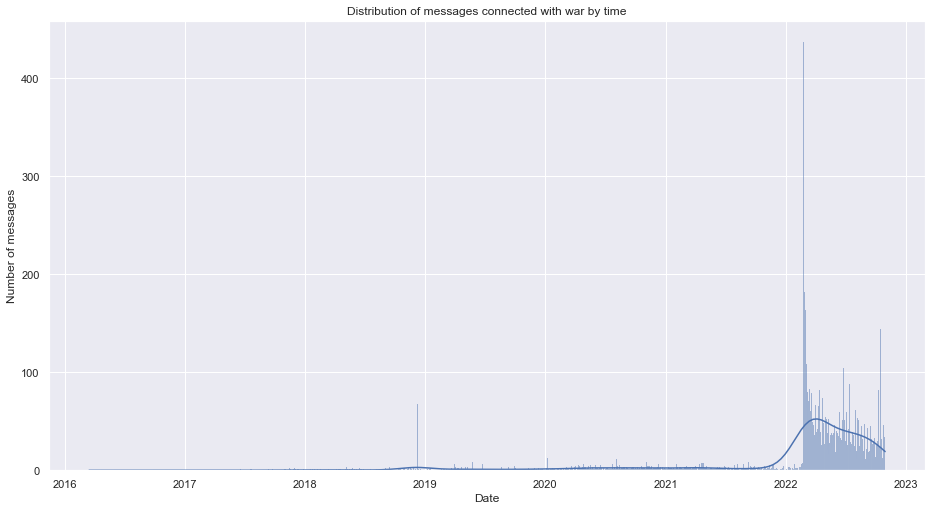

In [178]:
res15 = result15[result15['contain_war_word'] == True]
sns.histplot(data=res15, x='date', kde=True)
plt.xlabel("Date")
plt.ylabel("Number of messages")
plt.title("Distribution of messages connected with war by time")

### 17. Telephone operators

In [179]:
df_meta.head(10)

,dialog_id,name,type,users,user_id,user_first_name,user_last_name,user_phone,user_username
0,-280495890,Дозор 32-го созива,Group,"{'user_id': 255026222, 'first_name': 'Kyrylo',...",255026222,Kyrylo,Kundik,None,kyrylokundik
1,-280495890,Дозор 32-го созива,Group,"{'user_id': 403299058, 'first_name': 'Vladysla...",403299058,Vladyslav,Zhulkevskyi,380671115581,OmniVlodeg
2,-280495890,Дозор 32-го созива,Group,"{'user_id': 365047140, 'first_name': 'Жёнушка'...",365047140,Жёнушка,None,380993810182,dasha_niko
3,-280495890,Дозор 32-го созива,Group,"{'user_id': 362015063, 'first_name': 'Маленька...",362015063,Маленька Чекістка,None,380663778532,natahiko
4,-280495890,Дозор 32-го созива,Group,"{'user_id': 281396127, 'first_name': 'Обережно...",281396127,Обережно Сімі,None,380661984243,leprekonchek
5,-280495890,Дозор 32-го созива,Group,"{'user_id': 382015004, 'first_name': 'Сальпака...",382015004,Сальпака,None,380975315564,armmaster
6,506161961,Vladyslav Matus,Private dialog,"{'user_id': 506161961, 'first_name': 'Vladysla...",506161961,Vladyslav,Matus,None,vladyslavmatus
7,-1001695031361,Могилянський Кібер-плац,Group,"{'user_id': 255144521, 'first_name': 'Трон', '...",255144521,Трон,None,380991394606,anyway_alive
8,-1001695031361,Могилянський Кібер-плац,Group,"{'user_id': 473669329, 'first_name': 'Кіпішна ...",473669329,Кіпішна Аліна,None,380970046960,Energeticsun
9,-1001695031361,Могилянський Кібер-плац,Group,"{'user_id': 670322433, 'first_name': 'Сах', 'l...",670322433,Сах,None,380933135038,astrofighter


In [185]:
df_meta_phone = df_meta[df_meta['user_phone'].notna()].drop_duplicates(subset=['user_phone'])

In [184]:
def find_operator(phone):
    if str(phone).startswith('38039'):
        return 'Kyivstar'
    if str(phone).startswith('38050'):
        return 'Vodafone'
    if str(phone).startswith('38063'):
        return 'lifecell'
    if str(phone).startswith('38066'):
        return 'Vodafone'
    if str(phone).startswith('38067'):
        return 'Kyivstar'
    if str(phone).startswith('38068'):
        return 'Kyivstar'
    if str(phone).startswith('38073'):
        return 'lifecell'
    if str(phone).startswith('38093'):
        return 'lifecell'
    if str(phone).startswith('38095'):
        return 'Vodafone'
    if str(phone).startswith('38096'):
        return 'Kyivstar'
    if str(phone).startswith('38097'):
        return 'Kyivstar'
    if str(phone).startswith('38098'):
        return 'Kyivstar'
    if str(phone).startswith('38099'):
        return 'Vodafone'
    return 'Unknown'

In [186]:
df_meta_phone['operator'] = df_meta_phone['user_phone'].apply(find_operator)

In [187]:
df_meta_phone

,dialog_id,name,type,users,user_id,user_first_name,user_last_name,user_phone,user_username,operator
1,-280495890,Дозор 32-го созива,Group,"{'user_id': 403299058, 'first_name': 'Vladysla...",403299058,Vladyslav,Zhulkevskyi,380671115581,OmniVlodeg,Kyivstar
2,-280495890,Дозор 32-го созива,Group,"{'user_id': 365047140, 'first_name': 'Жёнушка'...",365047140,Жёнушка,None,380993810182,dasha_niko,Vodafone
3,-280495890,Дозор 32-го созива,Group,"{'user_id': 362015063, 'first_name': 'Маленька...",362015063,Маленька Чекістка,None,380663778532,natahiko,Vodafone
4,-280495890,Дозор 32-го созива,Group,"{'user_id': 281396127, 'first_name': 'Обережно...",281396127,Обережно Сімі,None,380661984243,leprekonchek,Vodafone
5,-280495890,Дозор 32-го созива,Group,"{'user_id': 382015004, 'first_name': 'Сальпака...",382015004,Сальпака,None,380975315564,armmaster,Kyivstar
...,...,...,...,...,...,...,...,...,...,...
11773,-1001473132989,Старостат НаУКМА,Group,"{'user_id': 393207775, 'first_name': 'Valeria'...",393207775,Valeria,Tromsa,380933145757,tromsa_v,lifecell
11792,-1001473132989,Старостат НаУКМА,Group,"{'user_id': 393171236, 'first_name': 'Юлія', '...",393171236,Юлія,None,380936110420,yuleslaav,lifecell
11795,-1001473132989,Старостат НаУКМА,Group,"{'user_id': 368379354, 'first_name': 'Sasha', ...",368379354,Sasha,Timofeeva,380504122322,stimofeeva,Vodafone
11810,-1001473132989,Старостат НаУКМА,Group,"{'user_id': 333076997, 'first_name': 'Olesia',...",333076997,Olesia,Morodetska,380683856869,olesmoro,Kyivstar


Text(0.5, 1.0, 'Distribution of Phone operators within every users with known number')

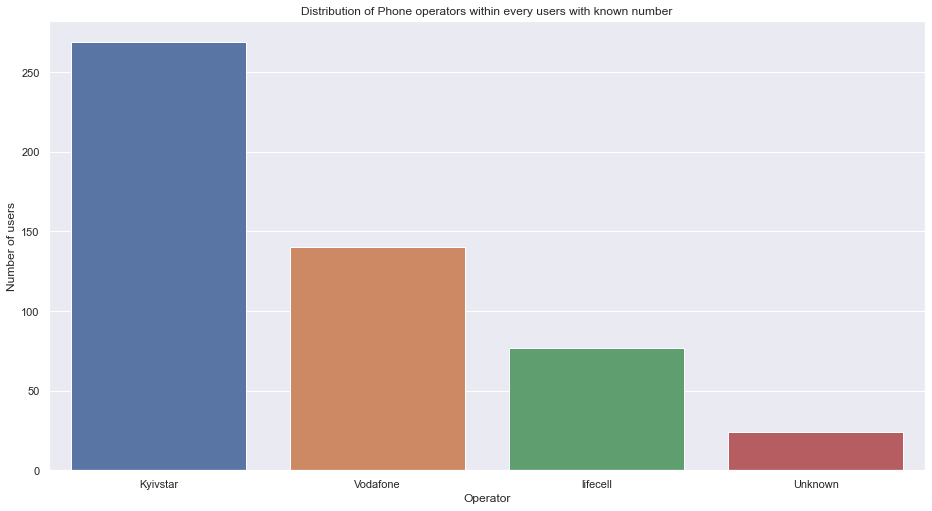

In [191]:
sns.countplot(data=df_meta_phone, x='operator')
plt.xlabel("Operator")
plt.ylabel("Number of users")
plt.title("Distribution of Phone operators within every users with known number")

## For further development, I've decided to use Questions number 5, 9, 12, 14, 16